In [1]:
import pandas as pd

In [20]:
data = pd.read_csv('coviddata.csv',encoding = 'latin-1')

In [21]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [23]:
data.shape

(41157, 6)

In [24]:
data['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [25]:
import matplotlib.pyplot as plt

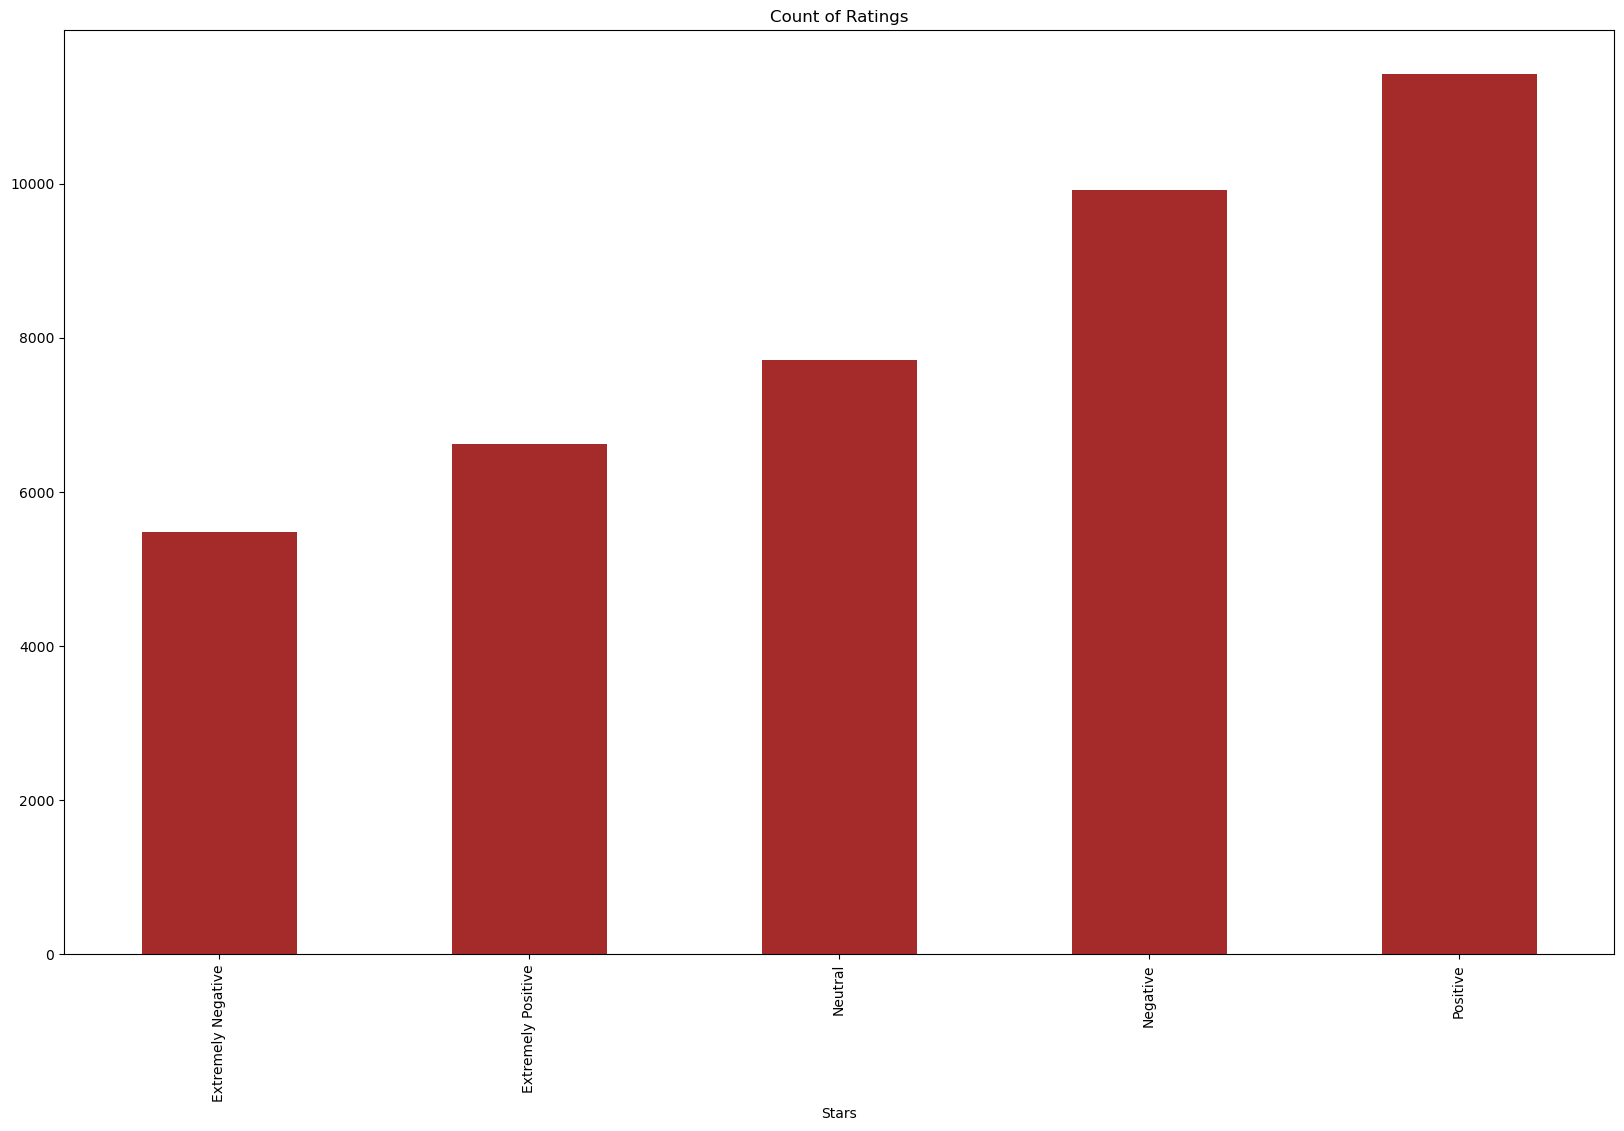

In [26]:
data["Sentiment"].value_counts(ascending = True).plot(kind = "bar", title = "Count of Ratings", figsize = (20,12), color = "Brown", xlabel = "Stars")
plt.show()

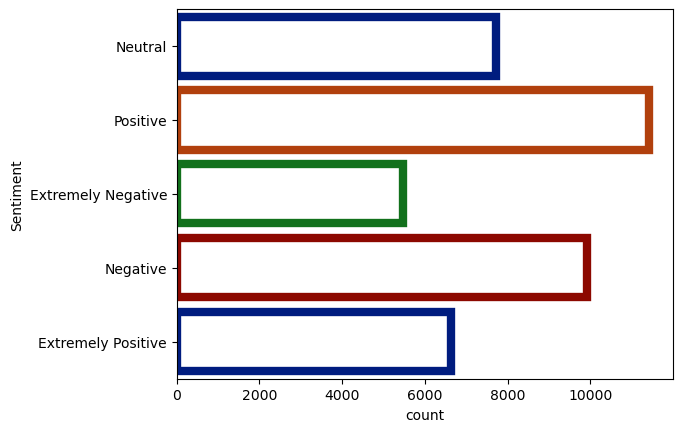

In [27]:
import seaborn as sns
sns.countplot(y = "Sentiment", data = data, facecolor= (1,1,1,1), linewidth = 6, edgecolor = sns.color_palette("dark",4))
plt.show()

In [28]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [31]:
data.drop(data.columns[[0,1,2,3]], axis = 1, inplace = True)

In [32]:
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [33]:
data.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [35]:
data.duplicated().sum()

0

In [38]:
blanks = []
for index in data["OriginalTweet"]:
    if index.isspace()== True:
        blanks.append(index)

In [39]:
print(blanks)

[]


In [40]:
x = data["OriginalTweet"]
y = data["Sentiment"]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.33)

In [43]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
textclf = Pipeline([("tfidf", TfidfVectorizer()),("clf",LinearSVC())])

In [46]:
textclf.fit(x_train, y_train)

C:\Users\nawaz\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
preds = textclf.predict(x_test)

In [52]:
print(accuracy_score(y_test, preds))

0.5544838757178618


In [54]:
cm = confusion_matrix(y_test, preds)
print(cm)

[[1134   22  511   54   77]
 [  19 1410   68   36  638]
 [ 634  110 1470  417  650]
 [  51   57  357 1591  491]
 [ 123  692  572  472 1926]]


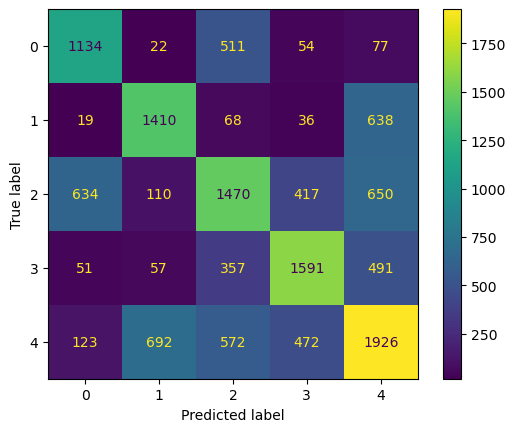

In [55]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [64]:
newtweet = [("I am depressed in the covid process. We will work in our offices afer this pandemic")]

In [65]:
textclf.predict(newtweet)

array(['Negative'], dtype=object)